In [72]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score


pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [73]:
df= pd.read_csv("profiles.csv")

In [74]:
df

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,NaN,NaN,socially,never,graduated from college/university,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",i am an avid movie watcher and follow the broa...,"my family, my dog, italy, words and music!",writing my book.,"running with my dog, finishing up the work wee...",i have a dream to sing at the alconquin in nyc...,you are seeking a long term co

In [75]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

the dataframe has 59,946 rows and 31 columns.

Continuous variables: age, height, income

Categorical variables: body_type, diet, drink, drugs, education, ethnicity, work, offspring, orientation, pets, religion, sex, sign, smoke, talk, status, last_online, location

The data also has 9 essays that include short sentences about the user

In [77]:
null = df.isnull().sum()
null = null.sort_values()
null = null.drop(['essay0','essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9'])
null

age                0
sex                0
orientation        0
location           0
last_online        0
income             0
status             0
height             3
speaks            50
drinks          2985
body_type       5296
smokes          5512
ethnicity       5680
education       6628
job             8198
sign           11056
drugs          14080
pets           19921
religion       20226
diet           24395
offspring      35561
dtype: int64

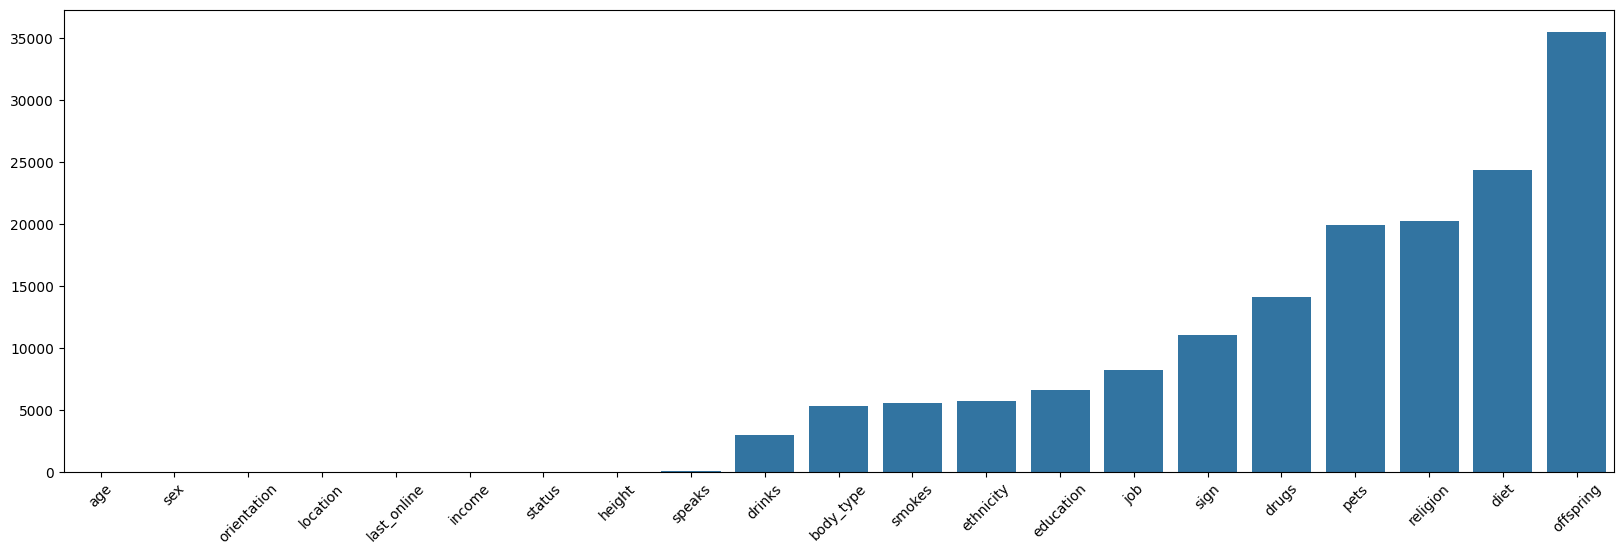

In [78]:
# dimension
plt.figure(figsize=(20, 6))
sns.barplot(null)
plt.xticks(rotation = 45)
plt.show()

Null values could also tell us a few things. For example, many have not specified whether they have children or what age they follow. For many, religion remains confidential information.  

Can also help us understand which target group to set for one of our ML models.

# EDA

average age: sex
f    32.818220
m    32.018588
Name: age, dtype: float64
number of men and women: sex
f     791477
m    1147194
Name: age, dtype: int64


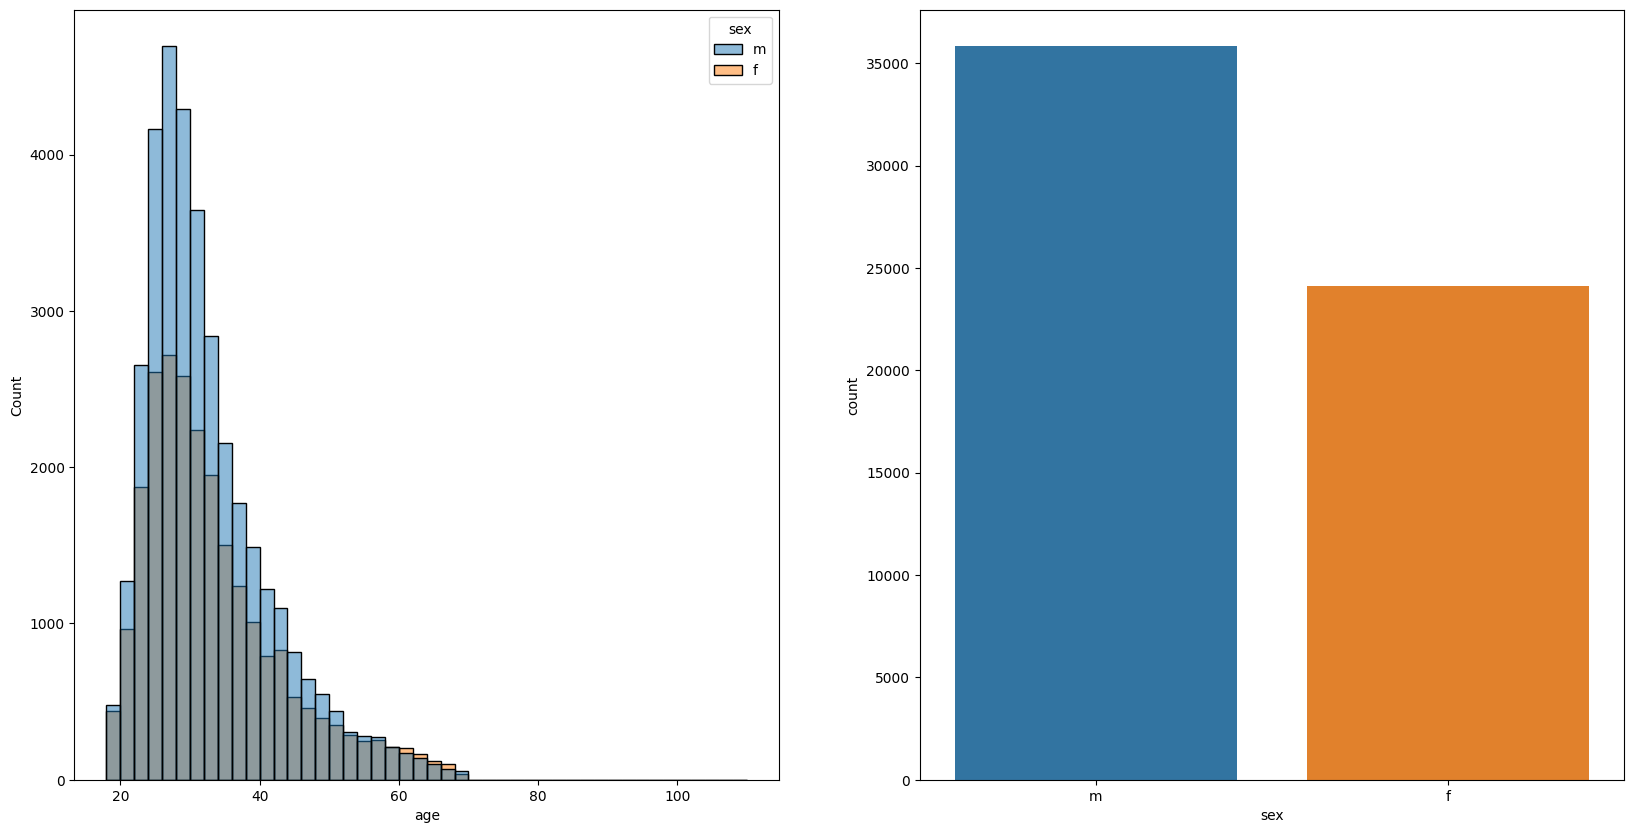

In [79]:
#Average Age
sex_avg_age = df.groupby("sex").age.mean()
print('average age:', sex_avg_age)

#Sex distribution
sex_counts = df.groupby("sex").age.sum()
print('number of men and women:', sex_counts)

# Dimension plot
plt.figure(figsize=(20, 10))

# subplot 1
plt.subplot(1,2,1)
ax = sns.histplot(data = df, x = 'age', hue='sex', binwidth = 2) #multiple='stack')
#ax.fig.set_figwidth(8)
#ax.fig.set_figheight(6)

# subplot 2
plt.subplot(1,2,2)
ax2 = sns.countplot(x='sex', hue='sex', data = df)

plt.show()

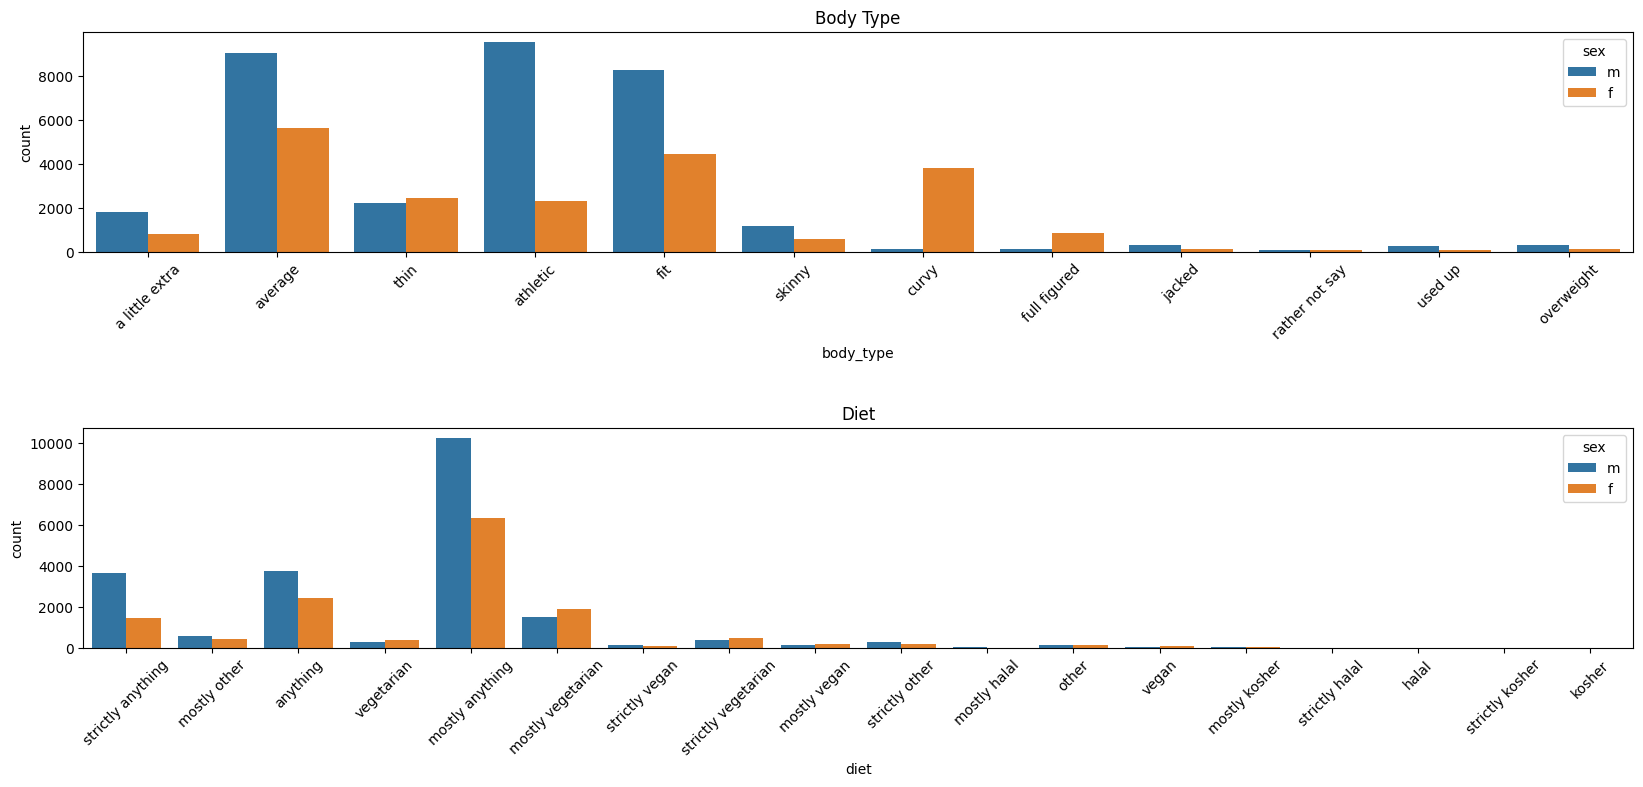

In [80]:
#body type & Diet

#dimension
plt.figure(figsize=(20,8))
plt.subplots_adjust(hspace=0.8)

#subplot 1
plt.subplot(2,1,1)
sns.countplot(data = df, x = 'body_type', hue = 'sex')
plt.xticks(rotation = 45)
plt.title('Body Type')

#subplot 2
plt.subplot(2,1,2)
sns.countplot(data = df, x = 'diet', hue ='sex')
plt.xticks(rotation = 45)
plt.title('Diet')

plt.show()

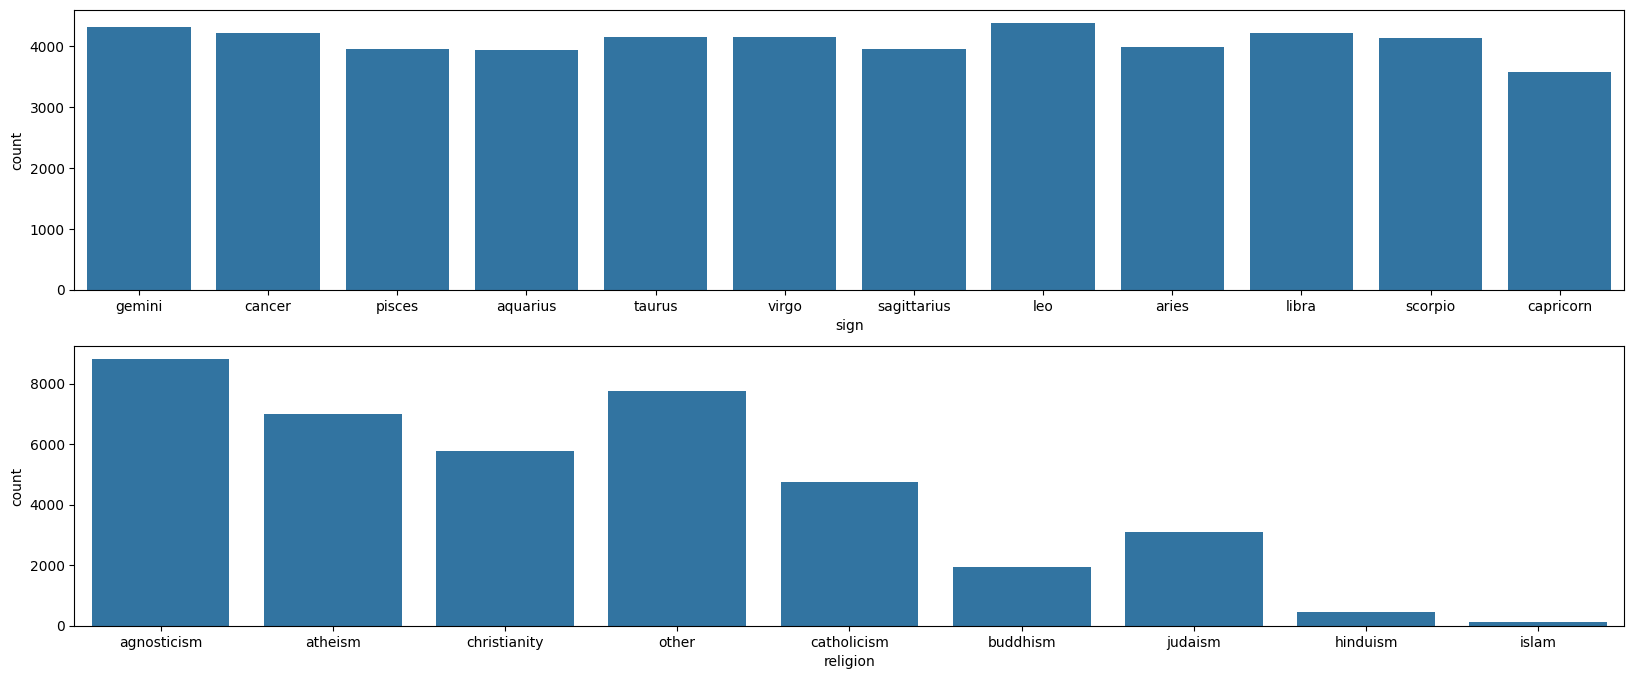

In [81]:
# Sign and religion

df['sign'] = df['sign'].str.split(" ").str.get(0)
df['religion'] = df['religion'].str.split(" ").str.get(0)

#dimension
plt.figure(figsize=(20,8))
#plt.subplots_adjust(hspace=0.8)

#subplot 1
plt.subplot(2,1,1)
sns.countplot(data=df, x='sign')

# subplot 2
plt.subplot(2,1,2)
sns.countplot(data=df, x='religion')

plt.show()

In [82]:
religion_without_null = df.dropna(subset=['religion'])
print(religion_without_null['religion'].value_counts())

religion
agnosticism     8812
other           7743
atheism         6985
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
islam            139
Name: count, dtype: int64


In [83]:
df['offspring'].value_counts()

offspring
doesn&rsquo;t have kids                                7560
doesn&rsquo;t have kids, but might want them           3875
doesn&rsquo;t have kids, but wants them                3565
doesn&rsquo;t want kids                                2927
has kids                                               1883
has a kid                                              1881
doesn&rsquo;t have kids, and doesn&rsquo;t want any    1132
has kids, but doesn&rsquo;t want more                   442
has a kid, but doesn&rsquo;t want more                  275
has a kid, and might want more                          231
wants kids                                              225
might want kids                                         182
has kids, and might want more                           115
has a kid, and wants more                                71
has kids, and wants more                                 21
Name: count, dtype: int64

what a disaster! let's try to put things in order and figure out whether or not there is a desire to have a child. We will not remove the NaNs. We believe that many do not specify for fear of being judged. For us it is important information.

In [84]:
def categorize_offspring(value):
    if pd.isna(value):
        return "Unknown"
    elif "doesn't have kids, and doesn't want any" in value:
        return "Doesn't have kids, doesn't want any"
    elif "doesn't have kids, but might want them" in value:
        return "Doesn't have kids, might want them"
    elif "doesn't have kids, but wants them" in value:
        return "Doesn't have kids, wants them"
    elif "doesn't want kids" in value:
        return "Doesn't want kids"
    elif "has kids, and wants more" in value:
        return "Has kids, wants more"
    elif "has a kid, and wants more" in value:
        return "Has a kid, wants more"
    elif "has kids, and might want more" in value:
        return "Has kids, might want more"
    elif "has a kid, and might want more" in value:
        return "Has a kid, might want more"
    elif "has kids, but doesn't want more" in value or "has a kid, but doesn't want more" in value:
        return "Has kids, doesn't want more"
    elif "wants kids" in value:
        return "Wants kids"
    elif "might want kids" in value:
        return "Might want kids"
    elif "has kids" in value:
        return "Has kids"
    elif "has a kid" in value:
        return "Has a kid"
    elif "doesn't have kids" in value:
        return "Doesn't have kids"
    else:
        return "Unknown"


df['offspring'] = df['offspring'].apply(categorize_offspring)

In [85]:
# Verify the result
print(df['offspring'].value_counts())

offspring
Unknown                       54620
Has kids                       2325
Has a kid                      2156
Has a kid, might want more      231
Wants kids                      225
Might want kids                 182
Has kids, might want more       115
Has a kid, wants more            71
Has kids, wants more             21
Name: count, dtype: int64


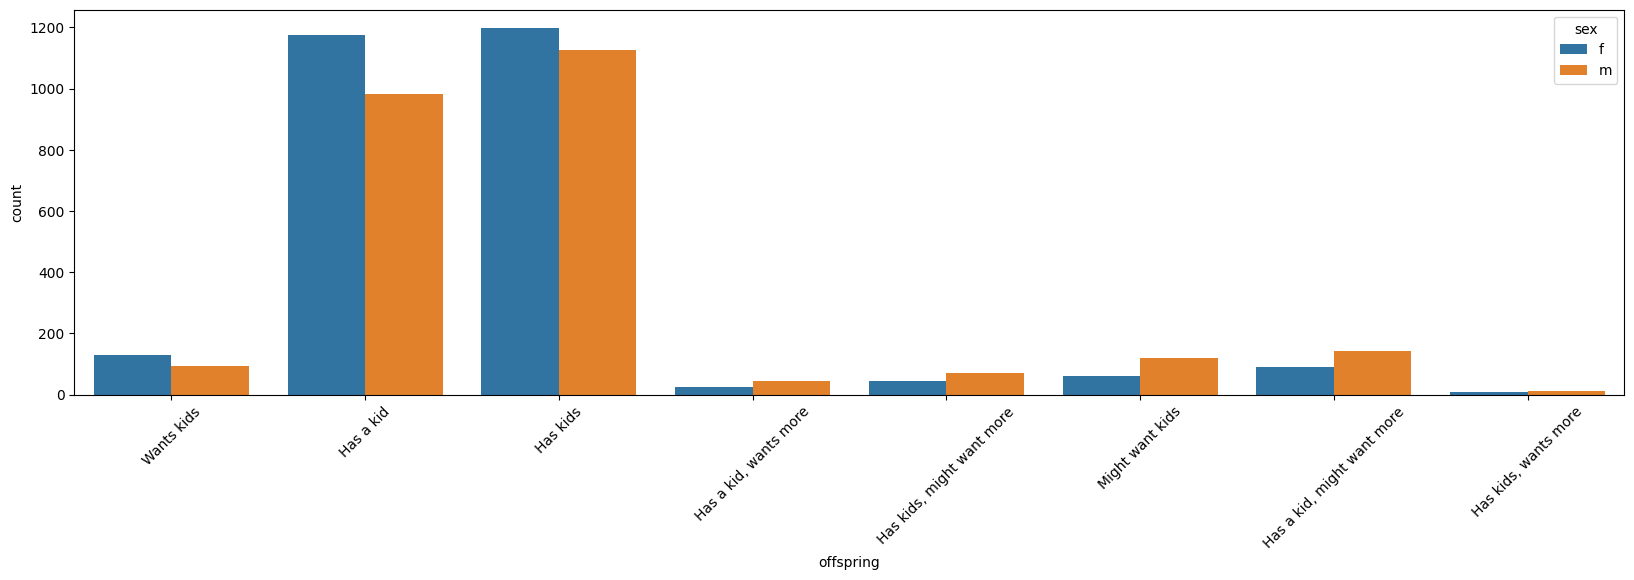

In [86]:
kids_desire_plot  = df[df['offspring'] != "Unknown"]

#dimension
plt.figure(figsize=(20,5))

# offspring plot
sns.countplot(data=kids_desire_plot , x='offspring', hue = 'sex')
plt.xticks(rotation=45)  # Ruota le etichette sull'asse x per una migliore leggibilità
plt.show()

In [87]:
# ethnicity
df['ethnicity'].value_counts()


ethnicity
white                                                                 32831
asian                                                                  6134
hispanic / latin                                                       2823
black                                                                  2008
other                                                                  1706
                                                                      ...  
middle eastern, indian, white                                             1
asian, middle eastern, black, white, other                                1
asian, middle eastern, indian, hispanic / latin, white, other             1
black, native american, indian, pacific islander, hispanic / latin        1
asian, black, indian                                                      1
Name: count, Length: 217, dtype: int64

Another disaster!

In [88]:
labels_to_keep = ['white', 'asian', 'hispanic / latin', 'black', 'other']

# Utilizza il metodo .isin() per creare un filtro basato su queste etichette
filter_ethnicity = df['ethnicity'].isin(labels_to_keep)

# Applica il filtro per mantenere solo le righe desiderate
df = df[filter_ethnicity]

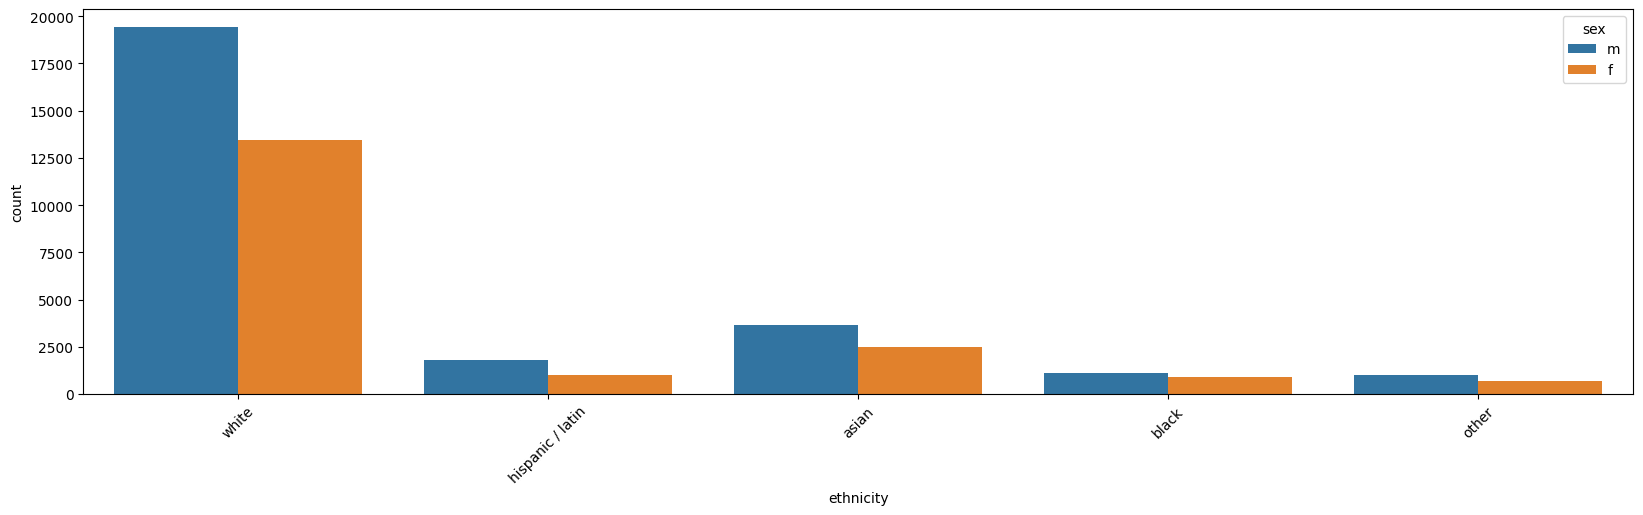

In [89]:
#dimension
plt.figure(figsize=(20,5))

sns.countplot(data=df , x='ethnicity', hue='sex')
plt.xticks(rotation=45)  # Ruota le etichette sull'asse x per una migliore leggibilità
plt.show()

In [90]:
df['location'].value_counts()

location
san francisco, california    23707
oakland, california           5358
berkeley, california          3127
san mateo, california         1019
palo alto, california          848
                             ...  
los gatos, california            1
asheville, north carolina        1
boulder, colorado                1
freedom, california              1
seattle, washington              1
Name: count, Length: 174, dtype: int64

In [91]:
df['region'] = df['location'].apply(lambda x: x.split(', ')[-1])

# Verifica i risultati
print(df[['location', 'region']].head())

                        location      region
1            oakland, california  california
3           berkeley, california  california
5      san francisco, california  california
7      san francisco, california  california
8  belvedere tiburon, california  california


C:\Users\Giorgio\AppData\Local\Temp\ipykernel_39256\2841017062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region'] = df['location'].apply(lambda x: x.split(', ')[-1])


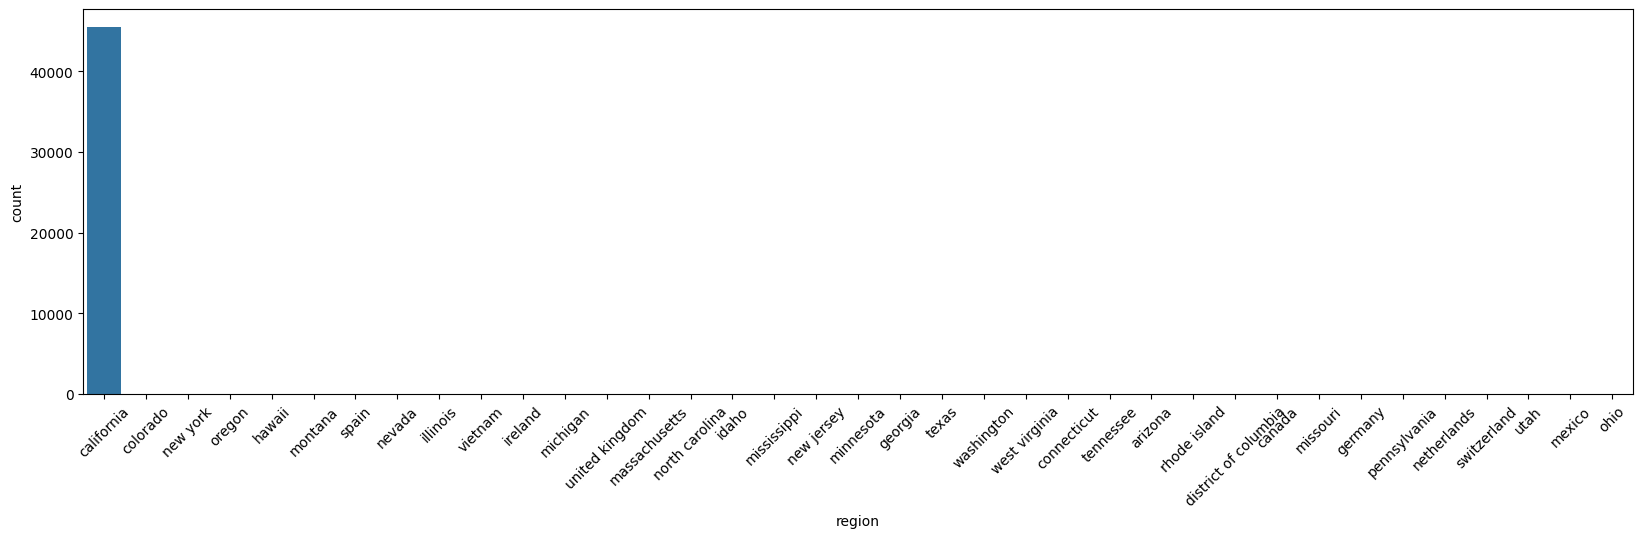

region
california              45433
new york                   14
illinois                    5
massachusetts               4
oregon                      3
texas                       3
michigan                    3
united kingdom              2
district of columbia        2
washington                  2
georgia                     2
colorado                    2
minnesota                   2
hawaii                      2
ireland                     1
north carolina              1
mexico                      1
utah                        1
switzerland                 1
netherlands                 1
pennsylvania                1
germany                     1
missouri                    1
canada                      1
rhode island                1
arizona                     1
tennessee                   1
connecticut                 1
west virginia               1
montana                     1
spain                       1
nevada                      1
vietnam                     1
new

In [92]:
#dimension
plt.figure(figsize=(20,5))

sns.countplot(data=df, x='region')
plt.xticks(rotation=45)

plt.show()

print(df['region'].value_counts())

In [93]:
df['job'].value_counts()

job
other                                5828
science / tech / engineering         3731
computer / hardware / software       3721
student                              3605
sales / marketing / biz dev          3523
artistic / musical / writer          3326
medicine / health                    2848
education / academia                 2753
executive / management               1854
banking / financial / real estate    1797
entertainment / media                1751
law / legal services                 1078
hospitality / travel                 1040
construction / craftsmanship          781
clerical / administrative             634
political / government                547
rather not say                        321
transportation                        284
unemployed                            212
retired                               212
military                              141
Name: count, dtype: int64

# Pre-Processing

What we want to do is focus on the essays. We can understand more about the essays based on what they write. Let's find out if we can trivially predict sex

In [94]:
df_essay = df[['essay0','essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'sex']]

df_essay.drop_duplicates()
df_essay.dropna(inplace=True)

C:\Users\Giorgio\AppData\Local\Temp\ipykernel_39256\948556471.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_essay.dropna(inplace=True)


In [95]:
df_essay

,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,sex
5,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,"books: to kill a mockingbird, lord of the ring...","like everyone else, i love my friends and fami...",what my contribution to the world is going to ...,out with my friends!,i cried on my first day at school because a bi...,you're awesome.,m
9,my names jake.<br />\ni'm a creative guy and i...,i have an apartment. i like to explore and che...,i'm good at finding creative solutions to prob...,i'm short,i like some tv. i love summer heights high and...,"music, my guitar<br />\ncontrast<br />\ngood f...",<strong><em>you should</em></strong>,<strong><em>send a message</em></strong>,<em><strong>and say hi.</strong></em>,you can rock the bells,m
10,"update: i'm seeing someone, so off the market ...",i have three jobs. i've been doing sound and l...,"hugging, kissing, laughing, motivating people,...",my huge goofy smile,"i'm constantly reading, i read at what my frie...",family<br />\nfriends<br />\nfood<br />\nwomen...,"snowboarding, food, women, goofy nerd stuff, a...",having dinner and drinks with friends and/or w...,i used to wish for a jetpack when blowing out ...,you are a complex woman with healthy self-este...,m
11,"i was born in wisconsin, grew up in iowa, and ...",i'm currently the youngest member on an intern...,i'm really good at a little bit of everything....,"the way i dress. some days it's hats, other da...",books = yes. avid reader.<br />\nmoves = etern...,"guitar - even if i don't play it all the time,...",a little bit of everything. but mostly social ...,hanging out with a small group of friends--sta...,i'm picky when it comes to dating. i know what...,"if you know who you are, who you want, where y...",m
16,"i just moved to the bay area from austin, tx (...","making music, programming, getting back into a...","i'm from louisiana, so cooking and eating are ...","lately, i keep getting asked ""are you with the...",movies/tv/etc:<br />\nthe big lebowski (and ot...,(in no particular order)<br />\n<br />\n- good...,- methodologies for practicing creative skills...,i just moved here and am still getting to know...,i am in my 30's and still cannot grow a mustac...,you want to help me assemble ikea stuff and/or...,m
...,...,...,...,...,...,...,...,...,...,...,...
59935,i am a mom first and foremost. currently separ...,i currently work at safeway. hopefully not for...,a lot of things...,my eyes and then the fact that i am pretty str...,i love to read and so i do not have an absolut...,my kids<br />\nmy ipod/iphone<br />\nwater<br ...,everything i have and want to do!,"either working, hang in' with my kids or out h...",hahaha! i'm not telling...yet.,"you kept reading after currently separated, ar...",f
59937,a cautious photo for a cautious dude (i'm havi...,mourning the loss (they broke in ecuador i thi...,conscientiousness. adding -ness to words that ...,probably that i have no hair (unless i'm weari...,i get anxious when people ask about favorites....,"water. air. food. clothes (if its cold, though...",thinking,was in class friday nights this past semester....,i wish my sexual preferences were clearer to m...,you don't know what it's all about...,m
59939,hi there and thanks for checking out my profil...,i'm spending time enjoying the best job i've e...,"making cool electronic stuff, being someone pe...",i needed an expert opinion for this section so...,music: rock and roll artists that top my list...,trixie the cat<br />\na double shot of good es...,"how the web, new social media, and collaborati...",enjoying a glass of red wine or a scotch on th...,i really like listening to and dancing to disco!,"you want to meet and get to know a talented, i...",m
59943,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping 

# Model Selection

We will use Naive Bayes for text analysis. Naive Bayes is an excellent model for text analysis. 

In [96]:
from sklearn.pipeline import make_pipeline

# We combine all the essays into a series. Each essay will be separated by a space
df_essay['all_essays'] = df_essay[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']].apply(lambda x: ' '.join(x.dropna()), axis=1)

X = df_essay['all_essays']
y = df_essay['sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# You can combine `CountVectorizer()` and `MultinomialNB()` using a `Pipeline` to automate

model = make_pipeline(CountVectorizer(), MultinomialNB())

model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)
accuracy_sex = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_sex}")

C:\Users\Giorgio\AppData\Local\Temp\ipykernel_39256\1406479974.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_essay['all_essays'] = df_essay[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']].apply(lambda x: ' '.join(x.dropna()), axis=1)


Accuracy: 0.7462121212121212


In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           f       0.64      0.83      0.72      2707
           m       0.86      0.69      0.77      4157

    accuracy                           0.75      6864
   macro avg       0.75      0.76      0.74      6864
weighted avg       0.77      0.75      0.75      6864



True Positive: 0.4179778554778555
False Positive: 0.06614219114219114
True Negative: 0.32823426573426573
False Negative: 0.18764568764568765


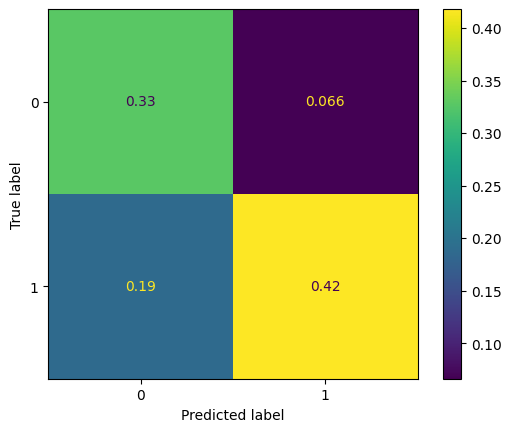

In [98]:
# Calcola la matrice di confusione
cm = confusion_matrix(y_test, y_pred, normalize='all')

# Usa ravel per estrarre TP, FP, TN, FN
tn, fp, fn, tp = cm.ravel()

print(f"True Positive: {tp}")
print(f"False Positive: {fp}")
print(f"True Negative: {tn}")
print(f"False Negative: {fn}")

# Visualizza la matrice di confusione
ConfusionMatrixDisplay(cm).plot()

Our model has an accuracy of 74% in identifying sex, and very good identification rates of true positives and false negatives (false negatives a little high)

what if we wanted to predict the religion, diet or drinking? 

In [99]:
df_essay = df[['essay0','essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'religion']]

df_essay.drop_duplicates()
df_essay.dropna(inplace=True)

# We combine all the essays into a series. Each essay will be separated by a space
df_essay['all_essays'] = df_essay[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']].apply(lambda x: ' '.join(x.dropna()), axis=1)

X = df_essay['all_essays']
y = df_essay['religion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# You can combine `CountVectorizer()` and `MultinomialNB()` using a `Pipeline` to automate

model = make_pipeline(CountVectorizer(), MultinomialNB())

model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)
accuracy_religion = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_religion}")

C:\Users\Giorgio\AppData\Local\Temp\ipykernel_39256\2218266186.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_essay.dropna(inplace=True)
C:\Users\Giorgio\AppData\Local\Temp\ipykernel_39256\2218266186.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_essay['all_essays'] = df_essay[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']].apply(lambda x: ' '.join(x.dropna()), axis=1)


Accuracy: 0.3462883793237466


In [100]:
df_essay = df[['essay0','essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'diet']]

df_essay.drop_duplicates()
df_essay.dropna(inplace=True)

# We combine all the essays into a series. Each essay will be separated by a space
df_essay['all_essays'] = df_essay[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']].apply(lambda x: ' '.join(x.dropna()), axis=1)

X = df_essay['all_essays']
y = df_essay['diet']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# You can combine `CountVectorizer()` and `MultinomialNB()` using a `Pipeline` to automate

model = make_pipeline(CountVectorizer(), MultinomialNB())

model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)
accuracy_diet = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_diet}")

C:\Users\Giorgio\AppData\Local\Temp\ipykernel_39256\3271782019.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_essay.dropna(inplace=True)
C:\Users\Giorgio\AppData\Local\Temp\ipykernel_39256\3271782019.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_essay['all_essays'] = df_essay[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']].apply(lambda x: ' '.join(x.dropna()), axis=1)


Accuracy: 0.47957535195015


In [101]:
df_essay = df[['essay0','essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'drinks']]

df_essay.drop_duplicates()
df_essay.dropna(inplace=True)

# We combine all the essays into a series. Each essay will be separated by a space
df_essay['all_essays'] = df_essay[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']].apply(lambda x: ' '.join(x.dropna()), axis=1)

X = df_essay['all_essays']
y = df_essay['drinks']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# You can combine `CountVectorizer()` and `MultinomialNB()` using a `Pipeline` to automate

model = make_pipeline(CountVectorizer(), MultinomialNB())

model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)
accuracy_drinks = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_drinks}")

C:\Users\Giorgio\AppData\Local\Temp\ipykernel_39256\1254275150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_essay.dropna(inplace=True)
C:\Users\Giorgio\AppData\Local\Temp\ipykernel_39256\1254275150.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_essay['all_essays'] = df_essay[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']].apply(lambda x: ' '.join(x.dropna()), axis=1)


Accuracy: 0.7094938604372567


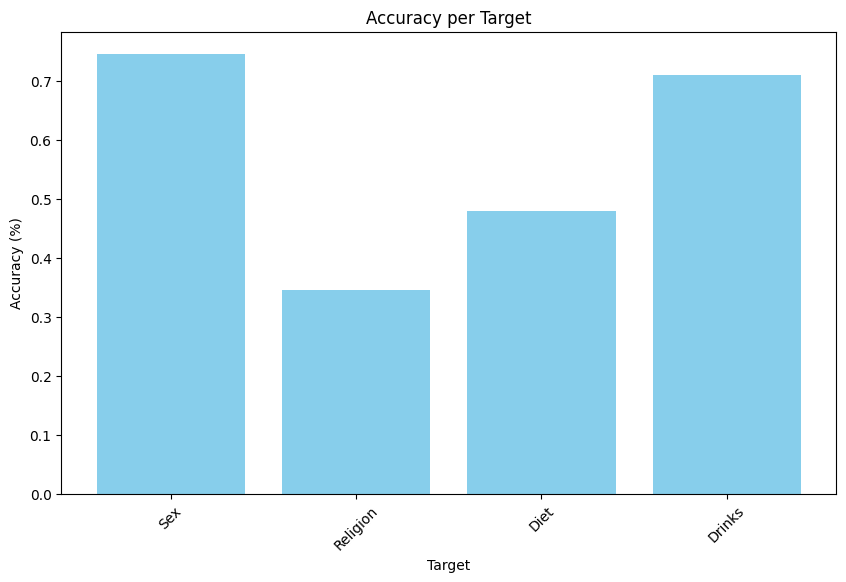

In [103]:
accuracy_data = {
    'Target': ['Sex', 'Religion', 'Diet', 'Drinks'],
    'Accuracy': [accuracy_sex, accuracy_religion, accuracy_diet, accuracy_drinks] 
}

accuracy_df = pd.DataFrame(accuracy_data)

plt.figure(figsize=(10, 6))  # Imposta le dimensioni del grafico
plt.bar(accuracy_df['Target'], accuracy_df['Accuracy'], color='skyblue')  # Crea il grafico a barre
plt.xlabel('Target')  # Etichetta per l'asse X
plt.ylabel('Accuracy (%)')  # Etichetta per l'asse Y
plt.title('Accuracy per Target')  # Titolo del grafico
plt.xticks(rotation=45)  # Ruota le etichette sull'asse X per una migliore leggibilità
plt.show()  # Mostra il grafico

Who would have thought. We can predict drinking preferences with very good probability. Of course, we can go deeper, but this result already amazes us!

Who knows what else we can predict through the words of the members!